# Задача
Наша задача — предсказать отток клиентов телеком компании.

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pprint

## Загрузка данных

1) Посмотрим на случайные строчки. 

2) Посмотрим, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, заменим их.

In [17]:
data = pd.read_csv('./train.csv')

In [18]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [19]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [20]:
data.shape

(5282, 20)

Проверим, есть ли пропуски в данных:

In [21]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [22]:
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 123.9+ KB


Мы видим, что у признака TotalSpent тип данных object, приведем к числовому типу:

In [23]:
data[pd.to_numeric(data.TotalSpent, errors='coerce').isnull()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Мы видим, что у этих объектов в колонке TotalSpent пустые строки. Заменим их на нули.

In [24]:
data.TotalSpent.replace(" ", 0, inplace = True)

Теперь приведем все к float.

In [25]:
data.TotalSpent=data.TotalSpent.astype('float')

In [26]:
data.TotalSpent

0       1026.35
1       1872.20
2         75.90
3       2570.00
4       6758.45
         ...   
5277      82.15
5278    2188.45
5279      55.05
5280    2215.25
5281    1375.60
Name: TotalSpent, Length: 5282, dtype: float64

Преобразуем данные в удобный нам вид:

In [27]:
# Переименуем колонку 'Sex'
data = data.rename(columns={'Sex':'Gender'})

In [36]:
# Категориальные признаки
cat_cols = [
    'Gender',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Заменим значения в колонке 'IsSeniorCitizen':

In [28]:
data.IsSeniorCitizen = data.IsSeniorCitizen.replace({0:'No', 1:'Yes'})

In [29]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Gender,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [30]:
data.to_csv('train_churn.csv', index=False)

In [31]:
pd.read_csv('train_churn.csv')

,ClientPeriod,MonthlySpending,TotalSpent,Gender,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,No,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,No,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,No,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


## Анализ данных

Посмотрим на распределение численных признаков:

In [33]:
data = pd.read_csv('train_churn.csv')

In [34]:
df_num = data.loc[:, num_cols]

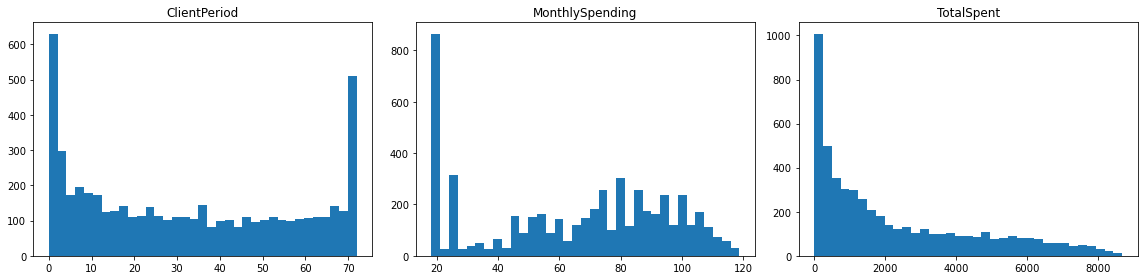

In [35]:
fig,axes = plt.subplots(figsize=(16,4), nrows=1, ncols=3);
axes = axes.ravel()
for idx, col in enumerate(num_cols):
    axes[idx].hist(data.loc[:, col], bins=35)
    axes[idx].set_title(col)
plt.tight_layout()

Видим, что у компании много как новых, но быстро уходящих клиентов, так и лояльных клиентов. В целом, судя по гистограммам MonthlySpending и TotalSpent, мы получили правдободобные закономерности, большая категория клиентов пользуется недорогими тарифами, и, поскольку отток клиентов довольно большой, максимум значений TotalSpent находится в промежутке до 1000 ден.единиц.

Теперь посчитаем количество значений в категориальных колонках:

In [37]:
df_cat = data[cat_cols]

In [38]:
for col in df_cat.columns:
    print(df_cat[col].value_counts())
    print('_____________________________________________')

Male      2655
Female    2627
Name: Gender, dtype: int64
_____________________________________________
No     4440
Yes     842
Name: IsSeniorCitizen, dtype: int64
_____________________________________________
No     2705
Yes    2577
Name: HasPartner, dtype: int64
_____________________________________________
No     3676
Yes    1606
Name: HasChild, dtype: int64
_____________________________________________
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
_____________________________________________
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
_____________________________________________
Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64
_____________________________________________
No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64
_____________________________________________


Построим barplot для категориалных признаков:

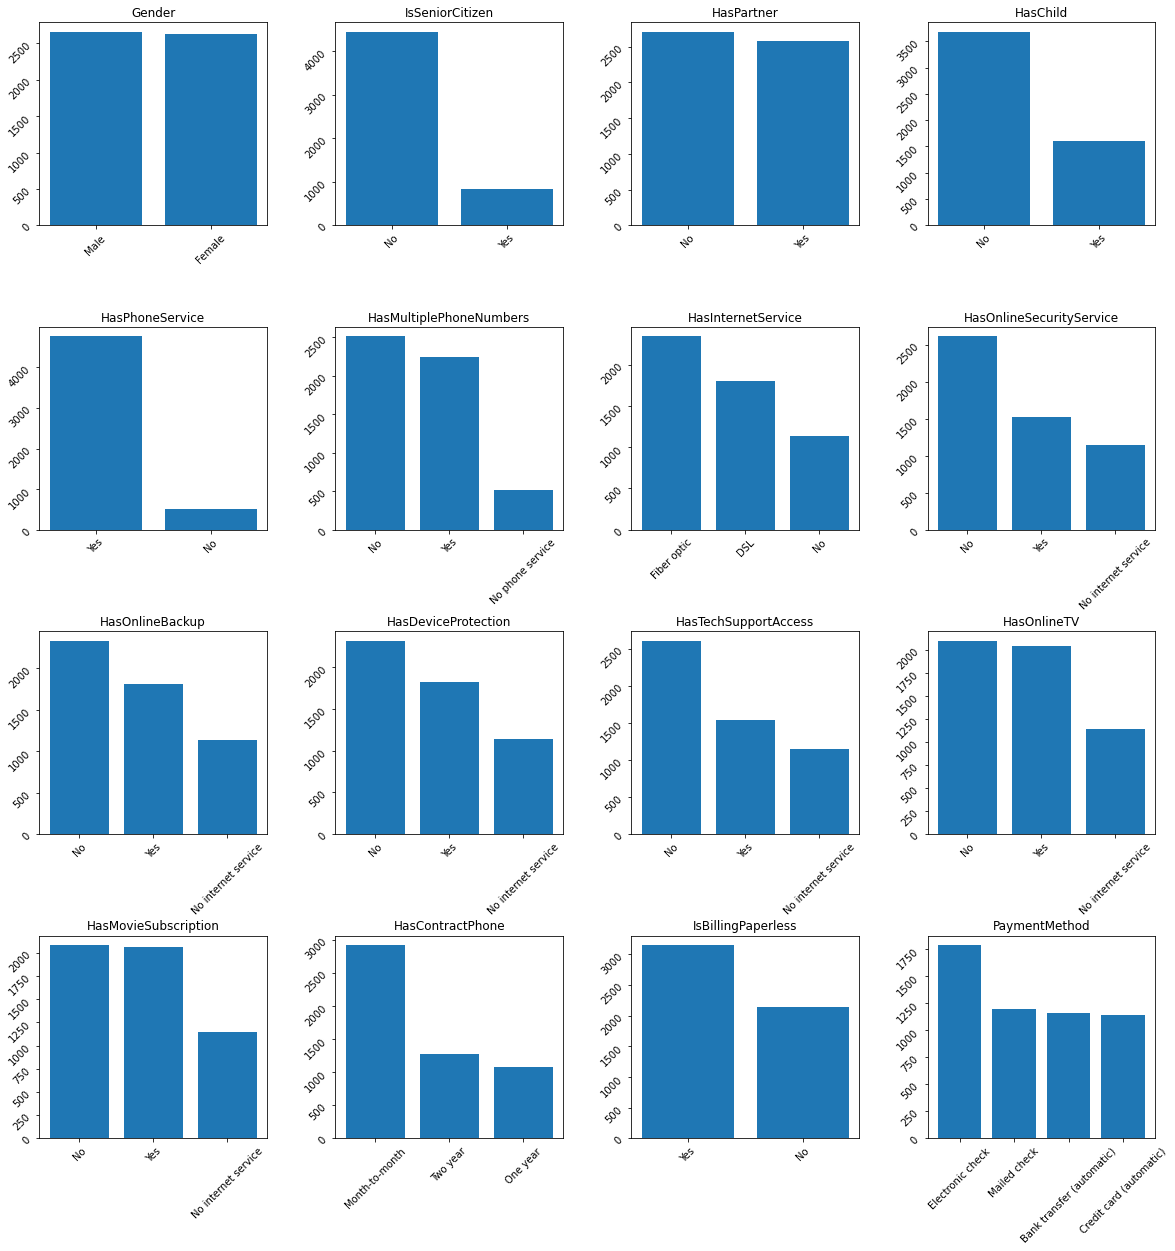

In [39]:
fig, ax = plt.subplots(figsize = (20, 20), nrows=4, ncols=4);
axis=ax.flatten()
for i, col in enumerate(df_cat.columns):
    bar_y = df_cat.loc[:, col].value_counts()
    bar_x = bar_y.index
    axis[i].bar(bar_x, bar_y)
    axis[i].set_title(col)
    axis[i].tick_params(labelrotation=45, labelsize = 10) #поворот надписей

plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.5) #расстояние между графиками

Теперь посмотрим на баланс классов:

In [40]:
data.Churn.value_counts(normalize=True)

0    0.737978
1    0.262022
Name: Churn, dtype: float64

Есть заметный дисбаланс классов.

## Применение линейных моделей

In [41]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

Отнормируем числовые признаки и закодируем категориальные:

In [42]:
scaler = StandardScaler()
num_scaled=scaler.fit_transform(df_num.values)
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

In [43]:
df_cat_scaled = pd.get_dummies(df_cat)

Создадим новый датасет, с обработанными данными, который будем в дальнейшем использовать для обучения:

In [44]:
X = pd.concat([df_num_scaled, df_cat_scaled], axis=1)
y = data.Churn
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Gender_Female,Gender_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.555852,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.183039,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.974768,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.124519,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970599,1,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


Для логистической регрессии с помощью кроссвалидации найдем лучшее значение гиперпараметра C - степени регуляризации весов:

In [45]:
c_vals = np.array([10**num for num in range(-3, 3)])

In [49]:
cv_model = GridSearchCV(estimator = LogisticRegression(), param_grid = {'C':c_vals}, cv=5, scoring = 'roc_auc', refit=True)
cv_model.fit(X, y)
cv_model.best_params_

D:\myPrograms\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\myPrograms\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re

{'C': 10.0}

Лучшее качество (усредненное на 5 фолдах) будет для C=100.0.

In [50]:
cv_model.best_score_

0.845115840881531

## Применение градиентного бустинга

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки.

1) Разделим выборку на train/valid. Протестируем catboost cо стандартными параметрами.

2) Протестируем разные занчения параметра количества деревьев и learning_rate'а и выберем лучшую по метрике ROC-AUC комбинацию. 


In [51]:
import catboost

Разделим выборку на train/test. Поскольку численные признаки для моделей, основанных на деревьях, нормировать не нужно, а категориальные CatBoost обрабатывает сама, возьмем исходные неприведенные данные:

In [52]:
X_origin = data.drop(['Churn'], axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_origin, y, train_size=0.8)

Опробуем CatBoost-модель с стандартными параметрами:

In [54]:
boosting_model = catboost.CatBoostClassifier(cat_features = cat_cols, random_seed=42)
boosting_model.fit(X_train, y_train, silent=True)

y_train_pred = boosting_model.predict(X_train)
y_test_pred = boosting_model.predict(X_test)

Рассчитаем метрику на тренировочных и тестовых данных:

In [55]:
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
print(train_auc, test_auc)

0.7542824420024132 0.7017694726873114


Теперь протестируем различные значения параметров n_estimators (количество деревьев) и learning_rate (скорость обучения):

In [56]:
boosting_model2 = catboost.CatBoostClassifier(cat_features=cat_cols,
                                             eval_metric='AUC:hints=skip_train~false', logging_level='Silent',
                                             random_seed=42)
boosting_model2.grid_search({'n_estimators': np.arange(10, 200, 10),
                           'learning_rate':np.arange(0.1, 0.5, 0.1)}, 
                           X_train, 
                           y_train, plot=True, refit=True, verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'params': {'iterations': 40, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39],
              'test-AUC-mean': [0.7784392906911193,
               0.7978553306936962,
               0.7979043618473306,
               0.8047855235

In [57]:
print(f"Best score:{boosting_model2.best_score_}")
best_params = boosting_model2.get_params()
for f in ("cat_features", "logging_level", "eval_metric"):
  best_params.pop(f)
print(f"Best params: {best_params}", end=' ')

Best score:{'learn': {'Logloss': 0.4023644495729128, 'AUC': 0.8574035284338941}}
Best params: {'random_seed': 42, 'iterations': 40, 'learning_rate': 0.1} 

# Предсказания

Перебор параметров улучшил результат, для предсказаний будем использовать последнюю модель.

In [58]:
best_model = boosting_model2

In [59]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

Поскольку лучшие результаты были получены с помощью модели, основанной на деревьях, нам не нужно нормировать числовые признаки и кодировать категориальные, потому что в CatBoost это уже реализовано.

In [60]:
X_test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

Пропусков в данных нет.

In [61]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

Опять же, видим, что в TotalSpent тип данных object, поэтому приведем данные к числовому типу:

In [62]:
X_test[pd.to_numeric(X_test.TotalSpent, errors='coerce').isnull()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [63]:
X_test.TotalSpent.replace(" ", 0, inplace = True)

In [64]:
X_test.TotalSpent = X_test.TotalSpent.astype('float')

In [66]:
X_test = X_test.rename(columns={'Sex':'Gender'})

In [67]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

In [68]:
X_test.to_csv('test_churn.csv', index=False)

# Kaggle



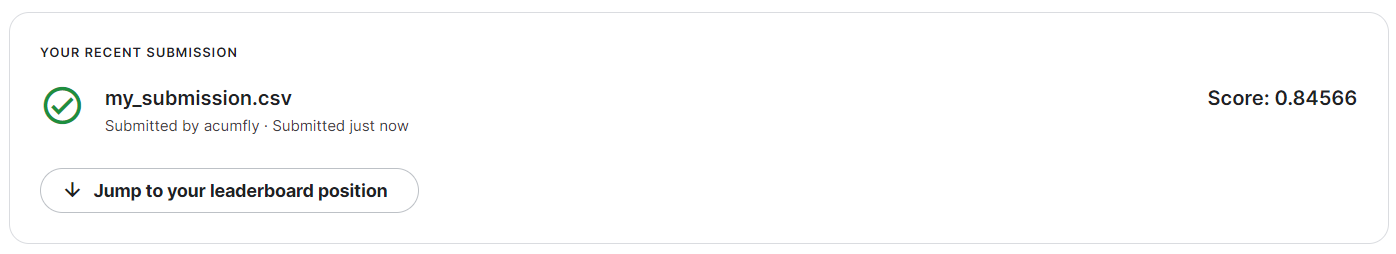